# - tabulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-pastel")
sns.set_theme(color_codes=True)

In [4]:
import urllib.request

url = 'https://api.covid19india.org/states_daily.json'

In [5]:
urllib.request.urlretrieve(url, "data_json")

('data_json', <http.client.HTTPMessage at 0x7f8f17550700>)

In [6]:
covid_data = pd.read_json("data_json")

In [7]:
covid_data

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
...,...
1045,"{'an': '2', 'ap': '74', 'ar': '1', 'as': '13',..."
1046,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
1047,"{'an': '0', 'ap': '96', 'ar': '0', 'as': '34',..."
1048,"{'an': '0', 'ap': '71', 'ar': '0', 'as': '22',..."


In [8]:
import json

with open("data_json") as f:
    data = json.load(f);
    

In [9]:
data = data["states_daily"]

In [10]:
covid_data = pd.json_normalize(data)

In [11]:
covid_data

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2,74,1,13,91,20,258,25-Feb-21,2021-02-25,0,...,5,Recovered,99,471,22,12222,0,135,52,219
1046,0,0,0,0,1,0,8,25-Feb-21,2021-02-25,0,...,0,Deceased,1,5,0,119,0,2,0,4
1047,0,96,0,34,46,69,279,26-Feb-21,2021-02-26,0,...,0,Confirmed,189,481,7,16019,0,0,53,216
1048,0,71,0,22,92,26,310,26-Feb-21,2021-02-26,0,...,0,Recovered,129,483,0,12361,0,0,38,223


In [12]:
covid_data = covid_data.drop("date", axis=1)

In [13]:
covid_data.set_index("dateymd", inplace=True)

In [14]:
df = covid_data[covid_data.loc[:,"status"] == "Confirmed"]

In [15]:
df

,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,...,0,Confirmed,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,0,Confirmed,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,...,0,Confirmed,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,...,0,Confirmed,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,...,0,Confirmed,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,1,41,0,14,84,38,274,0,128,0,...,0,Confirmed,114,449,2,10494,0,0,32,148
2021-02-23,1,70,0,21,59,37,274,0,145,0,...,0,Confirmed,0,442,4,13682,0,190,54,189
2021-02-24,0,94,0,27,54,41,247,0,200,2,...,0,Confirmed,345,463,2,16930,0,128,47,202


In [16]:
df.drop("status", inplace=True, axis=1);

/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df.drop("tt", inplace=True, axis=1);

In [35]:
df = df.apply(pd.to_numeric)


In [36]:
df_tail = df.tail(7)

In [37]:
df_tail

,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,py,rj,sk,tg,tn,tr,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,
2021-02-20,0,54,0,16,57,26,263,0,152,0,...,29,98,1,157,438,35,0,114,-374,193
2021-02-21,0,88,0,9,94,28,153,0,145,0,...,23,82,4,163,452,0,0,79,30,182
2021-02-22,1,41,0,14,84,38,274,0,128,0,...,8,83,0,114,449,2,0,0,32,148
2021-02-23,1,70,0,21,59,37,274,0,145,0,...,28,76,0,0,442,4,0,190,54,189
2021-02-24,0,94,0,27,54,41,247,0,200,2,...,28,99,0,345,463,2,0,128,47,202
2021-02-25,0,82,0,30,61,49,220,0,220,1,...,21,128,1,207,467,0,0,129,17,199
2021-02-26,0,96,0,34,46,69,279,0,256,1,...,0,149,0,189,481,7,0,0,53,216


In [38]:
df_tail.style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-20,0,54,0,16,57,26,263,0,152,0,57,258,22,111,37,68,490,4650,1,5,6281,1,3,257,2,0,65,352,29,98,1,157,438,35,0,114,-374,193
2021-02-21,0,88,0,9,94,28,153,0,145,0,39,283,19,121,31,84,413,4070,0,3,6971,0,4,299,2,1,58,348,23,82,4,163,452,0,0,79,30,182
2021-02-22,1,41,0,14,84,38,274,0,128,0,29,315,18,106,41,58,317,2212,1,15,5210,2,3,294,0,0,69,388,8,83,0,114,449,2,0,0,32,148
2021-02-23,1,70,0,21,59,37,274,0,145,0,57,348,20,131,50,94,383,4034,9,21,6218,1,3,246,1,0,62,414,28,76,0,0,442,4,0,190,54,189
2021-02-24,0,94,0,27,54,41,247,0,200,2,52,380,34,130,32,74,334,4106,11,6,8807,3,7,346,3,0,68,558,28,99,0,345,463,2,0,128,47,202
2021-02-25,0,82,0,30,61,49,220,0,220,1,71,424,42,166,76,108,453,3677,7,9,8702,3,3,368,0,6,89,563,21,128,1,207,467,0,0,129,17,199
2021-02-26,0,96,0,34,46,69,279,0,256,1,100,460,44,148,0,85,571,3671,0,2,8333,0,7,0,6,0,94,622,0,149,0,189,481,7,0,0,53,216


In [39]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 2020-03-14 to 2021-02-26
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      350 non-null    int64
 1   ap      350 non-null    int64
 2   ar      350 non-null    int64
 3   as      350 non-null    int64
 4   br      350 non-null    int64
 5   ch      350 non-null    int64
 6   ct      350 non-null    int64
 7   dd      350 non-null    int64
 8   dl      350 non-null    int64
 9   dn      350 non-null    int64
 10  ga      350 non-null    int64
 11  gj      350 non-null    int64
 12  hp      350 non-null    int64
 13  hr      350 non-null    int64
 14  jh      350 non-null    int64
 15  jk      350 non-null    int64
 16  ka      350 non-null    int64
 17  kl      350 non-null    int64
 18  la      350 non-null    int64
 19  ld      350 non-null    int64
 20  mh      350 non-null    int64
 21  ml      350 non-null    int64
 22  mn      350 non-null    int64
 23  mp  

In [40]:
def neg_color(x):
    color = 'red' if x>1000 else 'green'
    return "color: " + color

In [41]:
df_tail.style.applymap(neg_color)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-20,0,54,0,16,57,26,263,0,152,0,57,258,22,111,37,68,490,4650,1,5,6281,1,3,257,2,0,65,352,29,98,1,157,438,35,0,114,-374,193
2021-02-21,0,88,0,9,94,28,153,0,145,0,39,283,19,121,31,84,413,4070,0,3,6971,0,4,299,2,1,58,348,23,82,4,163,452,0,0,79,30,182
2021-02-22,1,41,0,14,84,38,274,0,128,0,29,315,18,106,41,58,317,2212,1,15,5210,2,3,294,0,0,69,388,8,83,0,114,449,2,0,0,32,148
2021-02-23,1,70,0,21,59,37,274,0,145,0,57,348,20,131,50,94,383,4034,9,21,6218,1,3,246,1,0,62,414,28,76,0,0,442,4,0,190,54,189
2021-02-24,0,94,0,27,54,41,247,0,200,2,52,380,34,130,32,74,334,4106,11,6,8807,3,7,346,3,0,68,558,28,99,0,345,463,2,0,128,47,202
2021-02-25,0,82,0,30,61,49,220,0,220,1,71,424,42,166,76,108,453,3677,7,9,8702,3,3,368,0,6,89,563,21,128,1,207,467,0,0,129,17,199
2021-02-26,0,96,0,34,46,69,279,0,256,1,100,460,44,148,0,85,571,3671,0,2,8333,0,7,0,6,0,94,622,0,149,0,189,481,7,0,0,53,216


In [42]:
df = df.apply(pd.to_numeric)


In [43]:
def bold_max(x):
    is_max = (x==x.max())
    return ["font-weight: bold " if i else '' for i in is_max]



In [44]:
df_tail.style.apply(bold_max).highlight_max(color='red').highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-20,0,54,0,16,57,26,263,0,152,0,57,258,22,111,37,68,490,4650,1,5,6281,1,3,257,2,0,65,352,29,98,1,157,438,35,0,114,-374,193
2021-02-21,0,88,0,9,94,28,153,0,145,0,39,283,19,121,31,84,413,4070,0,3,6971,0,4,299,2,1,58,348,23,82,4,163,452,0,0,79,30,182
2021-02-22,1,41,0,14,84,38,274,0,128,0,29,315,18,106,41,58,317,2212,1,15,5210,2,3,294,0,0,69,388,8,83,0,114,449,2,0,0,32,148
2021-02-23,1,70,0,21,59,37,274,0,145,0,57,348,20,131,50,94,383,4034,9,21,6218,1,3,246,1,0,62,414,28,76,0,0,442,4,0,190,54,189
2021-02-24,0,94,0,27,54,41,247,0,200,2,52,380,34,130,32,74,334,4106,11,6,8807,3,7,346,3,0,68,558,28,99,0,345,463,2,0,128,47,202
2021-02-25,0,82,0,30,61,49,220,0,220,1,71,424,42,166,76,108,453,3677,7,9,8702,3,3,368,0,6,89,563,21,128,1,207,467,0,0,129,17,199
2021-02-26,0,96,0,34,46,69,279,0,256,1,100,460,44,148,0,85,571,3671,0,2,8333,0,7,0,6,0,94,622,0,149,0,189,481,7,0,0,53,216


**supported CMAPS**



supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm...

In [46]:
df_tail.style.background_gradient('Accent',subset=['dl', 'kl'] )

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
dateymd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-20,0,54,0,16,57,26,263,0,152,0,57,258,22,111,37,68,490,4650,1,5,6281,1,3,257,2,0,65,352,29,98,1,157,438,35,0,114,-374,193
2021-02-21,0,88,0,9,94,28,153,0,145,0,39,283,19,121,31,84,413,4070,0,3,6971,0,4,299,2,1,58,348,23,82,4,163,452,0,0,79,30,182
2021-02-22,1,41,0,14,84,38,274,0,128,0,29,315,18,106,41,58,317,2212,1,15,5210,2,3,294,0,0,69,388,8,83,0,114,449,2,0,0,32,148
2021-02-23,1,70,0,21,59,37,274,0,145,0,57,348,20,131,50,94,383,4034,9,21,6218,1,3,246,1,0,62,414,28,76,0,0,442,4,0,190,54,189
2021-02-24,0,94,0,27,54,41,247,0,200,2,52,380,34,130,32,74,334,4106,11,6,8807,3,7,346,3,0,68,558,28,99,0,345,463,2,0,128,47,202
2021-02-25,0,82,0,30,61,49,220,0,220,1,71,424,42,166,76,108,453,3677,7,9,8702,3,3,368,0,6,89,563,21,128,1,207,467,0,0,129,17,199
2021-02-26,0,96,0,34,46,69,279,0,256,1,100,460,44,148,0,85,571,3671,0,2,8333,0,7,0,6,0,94,622,0,149,0,189,481,7,0,0,53,216


In [47]:
df_tail[['dl', 'kl', 'tn']].style.bar(subset='dl', color='green').bar(subset='kl', color='red').bar(subset='tn', color='purple')

,dl,kl,tn
dateymd,,,
2021-02-20,152,4650,438
2021-02-21,145,4070,452
2021-02-22,128,2212,449
2021-02-23,145,4034,442
2021-02-24,200,4106,463
2021-02-25,220,3677,467
2021-02-26,256,3671,481


# - part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-pastel")
sns.set_theme(color_codes=True)

/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


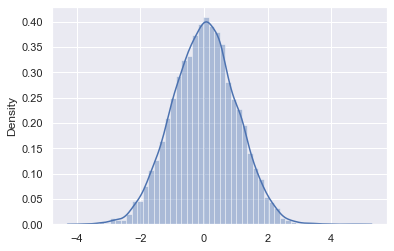

In [3]:
x = np.random.randn(10000)
sns.distplot(x, bins=50);

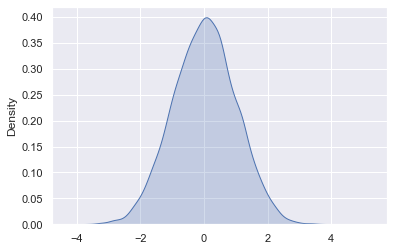

In [4]:
sns.kdeplot(x, shade=True);

In [5]:
y = np.random.uniform(size=10000)

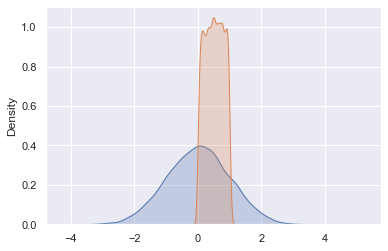

In [6]:
sns.kdeplot(x, shade=True)
sns.kdeplot(y, shade=True);

In [2]:
d = sns.load_dataset("diamonds")

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='x', ylabel='Density'>

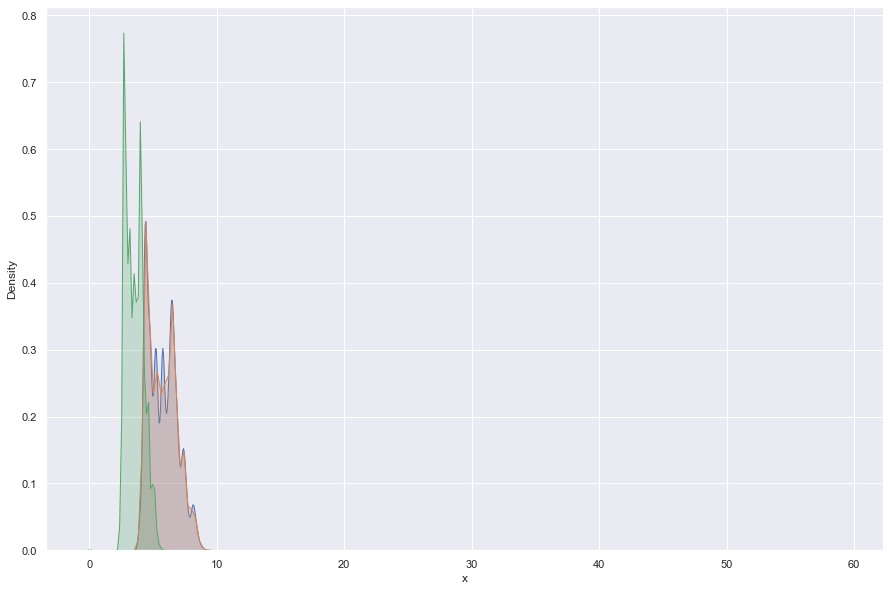

In [10]:
fig = plt.gcf()
fig.set_size_inches(15,10)

sns.kdeplot(d.loc[:,"x"], fill=True)
sns.kdeplot(d.loc[:,"y"], fill=True)
sns.kdeplot(d.loc[:,"z"], fill=True)


In [11]:
d

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

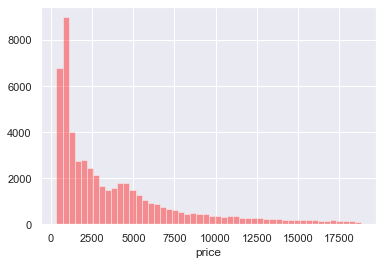

In [12]:
sns.distplot(d.loc[:,"price"], bins=50, color='red', kde=False)

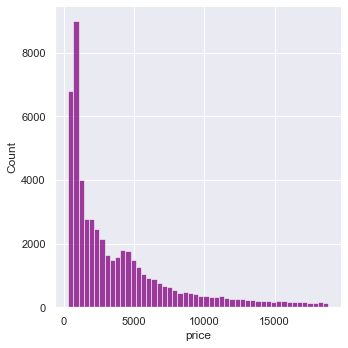

In [13]:
sns.displot(d.loc[:,"price"], bins=50, color='purple')

In [14]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


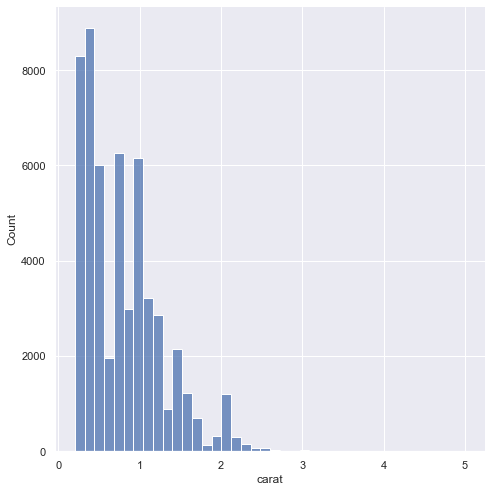

In [15]:
sns.displot(d.loc[:,"carat"],bins=40, height=7)

In [16]:
x = np.random.normal(22.5, 3, 1000)

<AxesSubplot:>

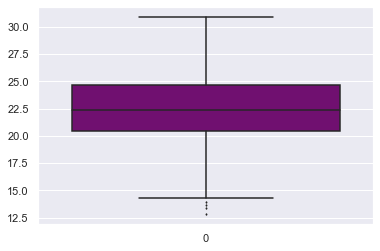

In [17]:
sns.boxplot(data=x, color='purple', whis=1.5, fliersize=1.2)

<AxesSubplot:>

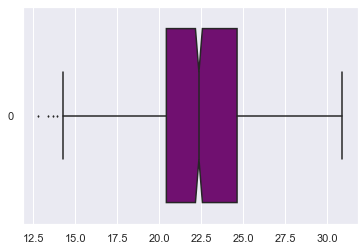

In [18]:
sns.boxplot(data=x, color='purple', whis=1.5, fliersize=1.2, orient='h', notch=True)

In [85]:
np.amax(d)

carat        5.01
depth       79.00
table       95.00
price    18823.00
x           10.74
y           58.90
z           31.80
dtype: float64

<AxesSubplot:>

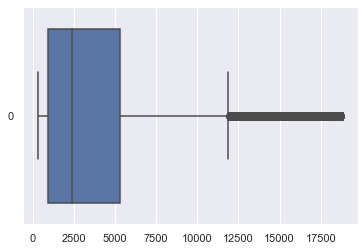

In [81]:
sns.boxplot(data = d.loc[:,"price"], orient='h')

<AxesSubplot:xlabel='price', ylabel='Density'>

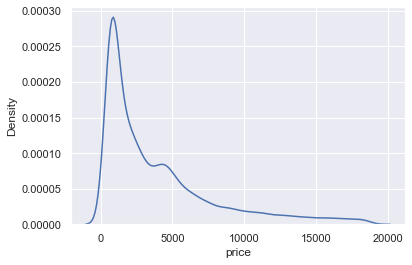

In [20]:
sns.kdeplot(d.loc[:,"price"])

In [3]:
p = sns.load_dataset("penguins")

/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

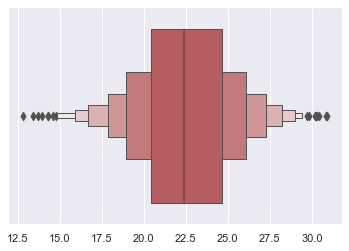

In [22]:
sns.boxenplot(x, color='r')

<AxesSubplot:>

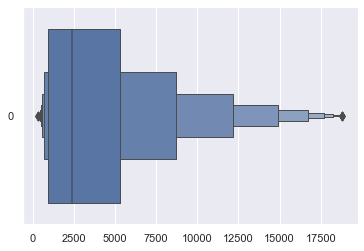

In [23]:
sns.boxenplot(data=d.loc[:,"price"], orient='h')

<AxesSubplot:xlabel='price', ylabel='Density'>

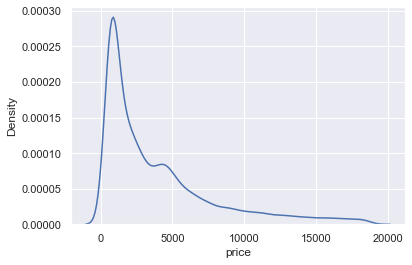

In [24]:
sns.kdeplot(d.loc[:,"price"])

In [4]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
p[p.select_dtypes(['object']).columns] = p.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [6]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.2 KB


In [28]:
p.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [29]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [30]:
p.dropna(inplace=True)

In [31]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


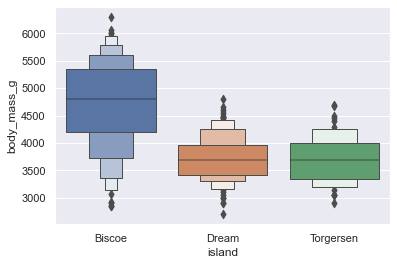

In [90]:
sns.boxenplot(y=p.loc[:,"body_mass_g"], x=p.loc[:,"island"]);

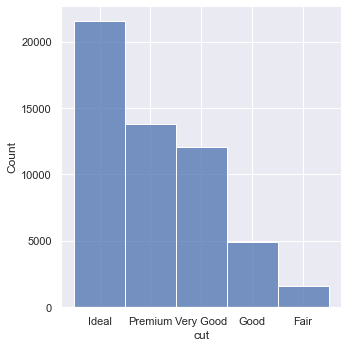

In [33]:
sns.displot(d.cut)

In [34]:
c = d.groupby("cut")["cut"].count()

<AxesSubplot:xlabel='cut'>

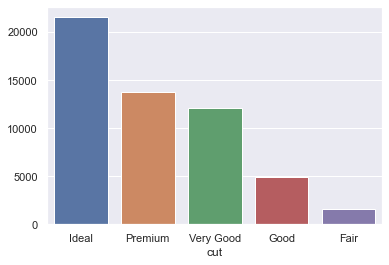

In [35]:
sns.barplot(x=c.index, y=c.values)

In [36]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 24.3 KB


In [38]:
species = p.groupby("species")["species"].count()

<AxesSubplot:xlabel='species'>

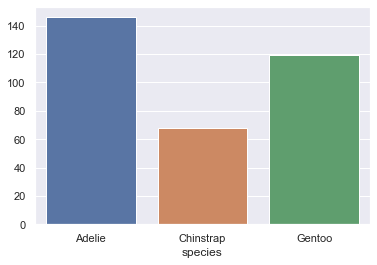

In [40]:
sns.barplot(x=species.index, y = species.values)

In [41]:
x = np.random.randn(1000)
y = np.random.randn(1000)

df = pd.DataFrame({'x':x, 'y':y})

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [44]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,0.046586,-0.028390
std,0.995009,1.005672
min,-2.888582,-3.194973
25%,-0.630253,-0.695176
50%,0.062775,-0.040142
75%,0.714563,0.637168
max,3.957285,3.436573


/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


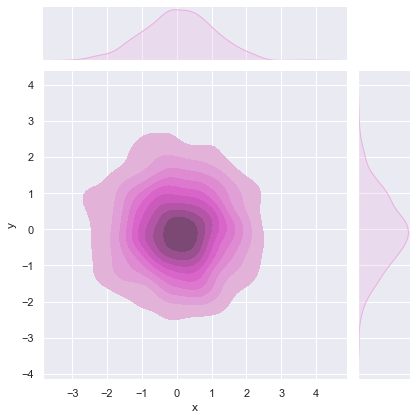

In [68]:
sns.jointplot('x', 'y', data=df, kind='kde', fill=True, color='#eaaee0');

In [79]:
x = np.random.randn(1000)
y = 20*x**2 + 10*x +15

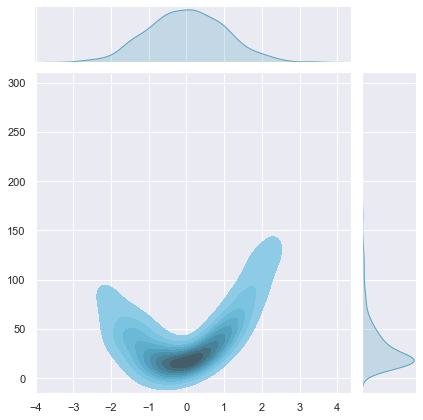

In [97]:
sns.jointplot(x=x, y=y, kind='kde', fill=True, color='#54a2bf')

###### 

In [100]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


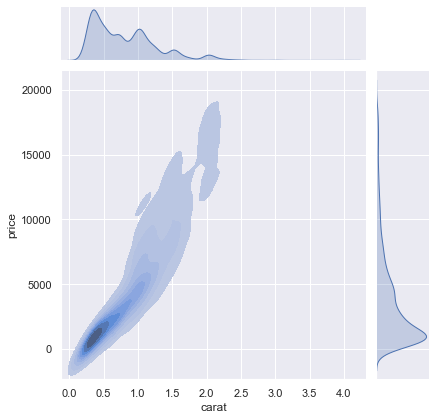

In [105]:
sns.jointplot(x='carat', y='price', data=d.sample(8000), kind='kde', fill=True)

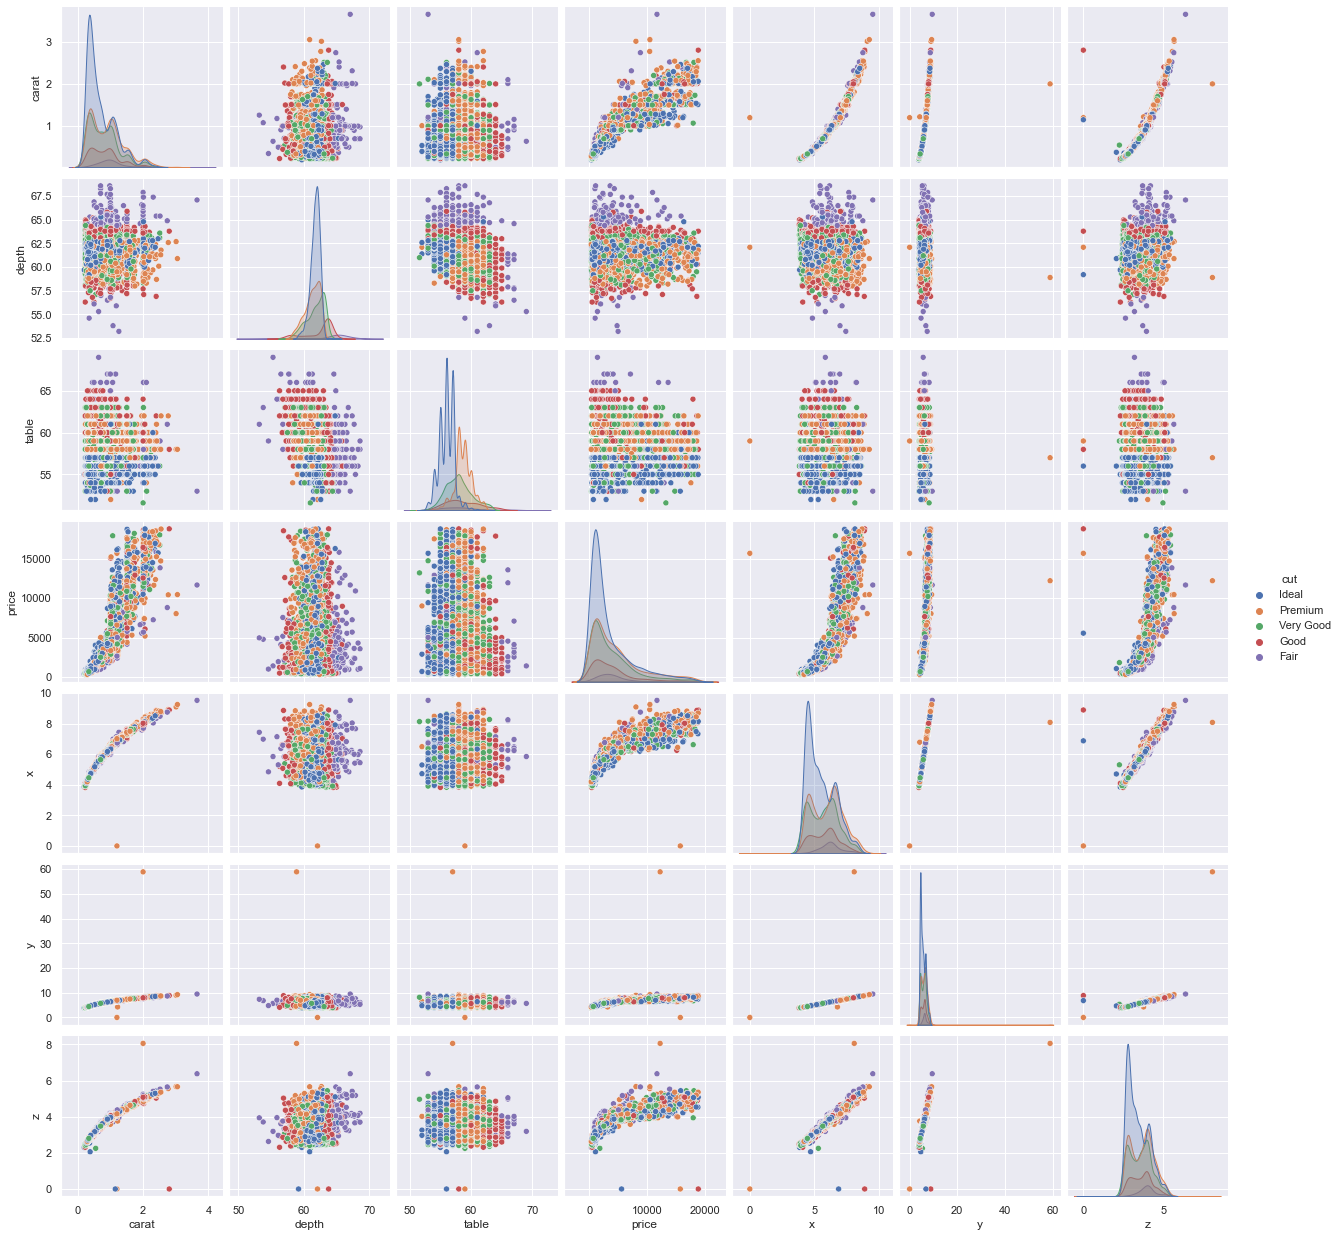

In [106]:
sns.pairplot(data=d.sample(5000), hue='cut') 

# - part 2

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


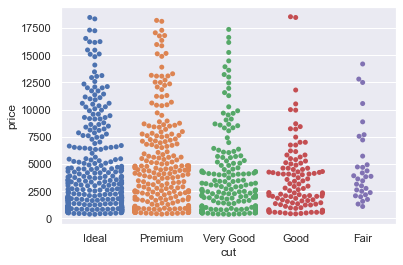

In [13]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000));

/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='price'>

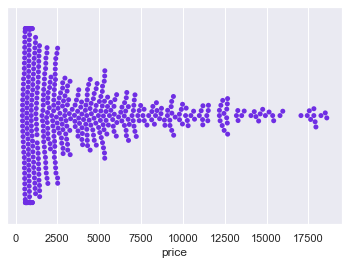

In [20]:
sns.swarmplot(x='price', data=d.sample(500), color='#6f2ee4')

In [22]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.2 KB


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

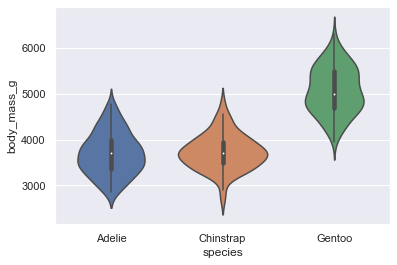

In [23]:
sns.violinplot(x='species', y='body_mass_g', data=p)

<AxesSubplot:xlabel='body_mass_g'>

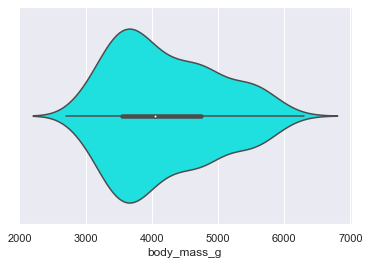

In [27]:
sns.violinplot(x='body_mass_g', data=p, color='cyan')

<AxesSubplot:xlabel='body_mass_g'>

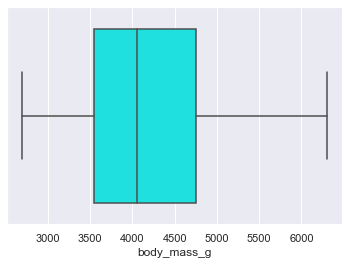

In [28]:
sns.boxplot(x='body_mass_g', data=p, color='cyan')

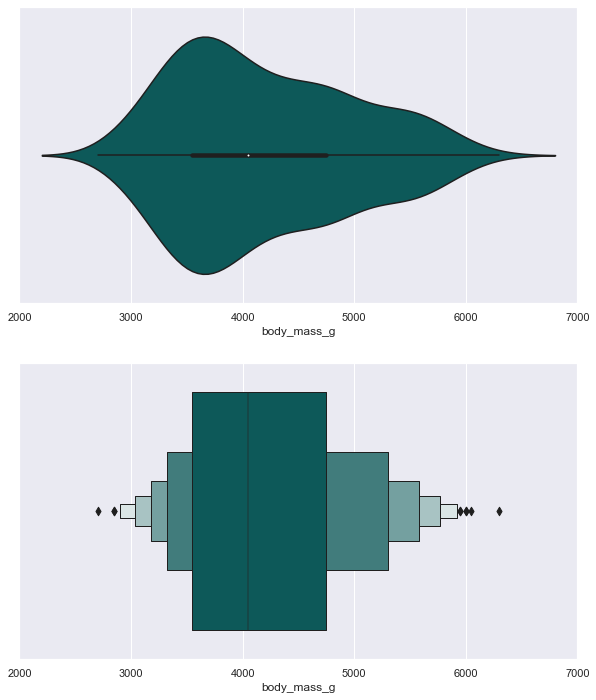

In [41]:
fig, axis = plt.subplots(nrows=2)
fig.set_size_inches(10,12)

p1 = sns.violinplot(x='body_mass_g', data=p, color='#006666', ax=axis[0])
p2 = sns.boxenplot(x='body_mass_g', data=p, color='#006666', ax=axis[1])

p1.set(xlim=(2000,7000))
p2.set(xlim=(2000,7000));

In [42]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.2 KB


<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

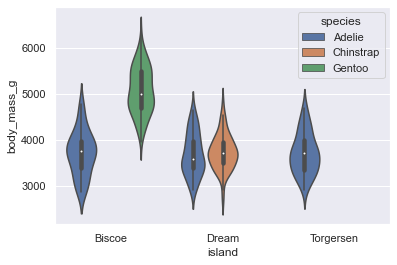

In [47]:
sns.violinplot(y='body_mass_g', x='island', data=p, hue='species')

<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

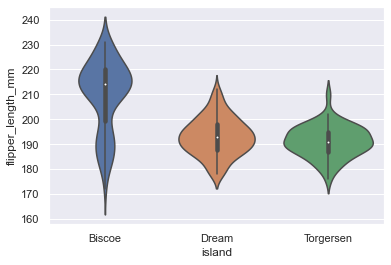

In [50]:
sns.violinplot(y='flipper_length_mm', x='island', data=p)

why is biscoe island's violin bimodal?


<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

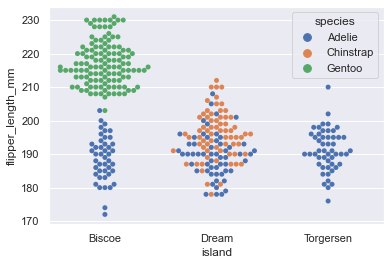

In [53]:
sns.swarmplot(y='flipper_length_mm', x='island', data=p, hue='species')

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

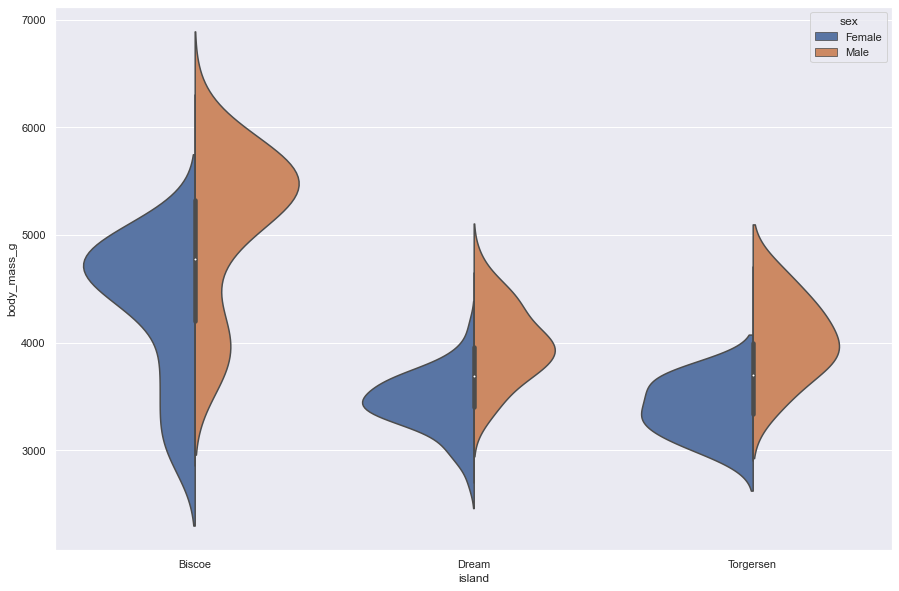

In [57]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.violinplot(y='body_mass_g', x='island', data=p, hue='sex', split=True)

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

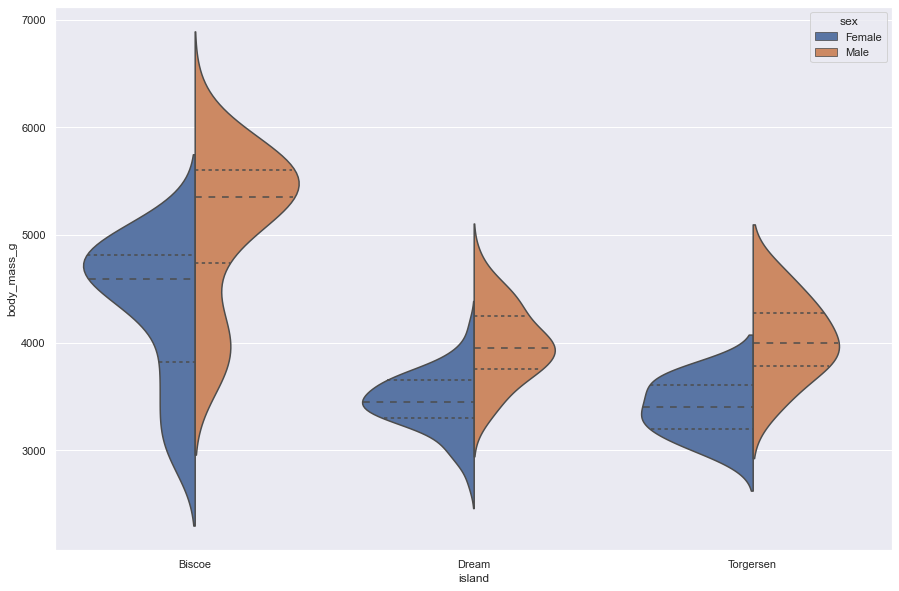

In [63]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.violinplot(y='body_mass_g', x='island', data=p, hue='sex', split=True, inner='quartile')

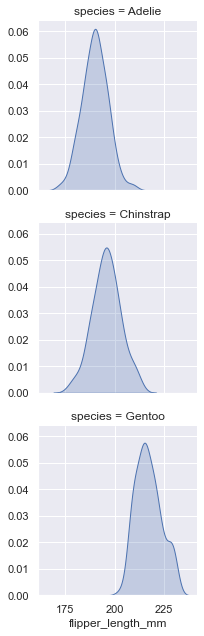

In [66]:
g = sns.FacetGrid(data=p, row='species')
g.map(sns.kdeplot, 'flipper_length_mm', fill=True)

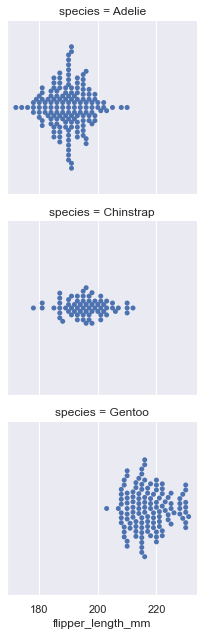

In [68]:
g = sns.FacetGrid(data=p, row='species')
g.map(sns.swarmplot, 'flipper_length_mm')

/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


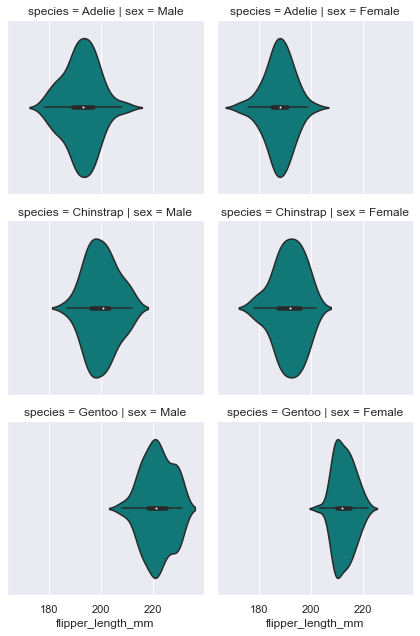

In [15]:
g = sns.FacetGrid(data=p, row='species', col='sex')
g.map(sns.violinplot, 'flipper_length_mm', color='#008888')

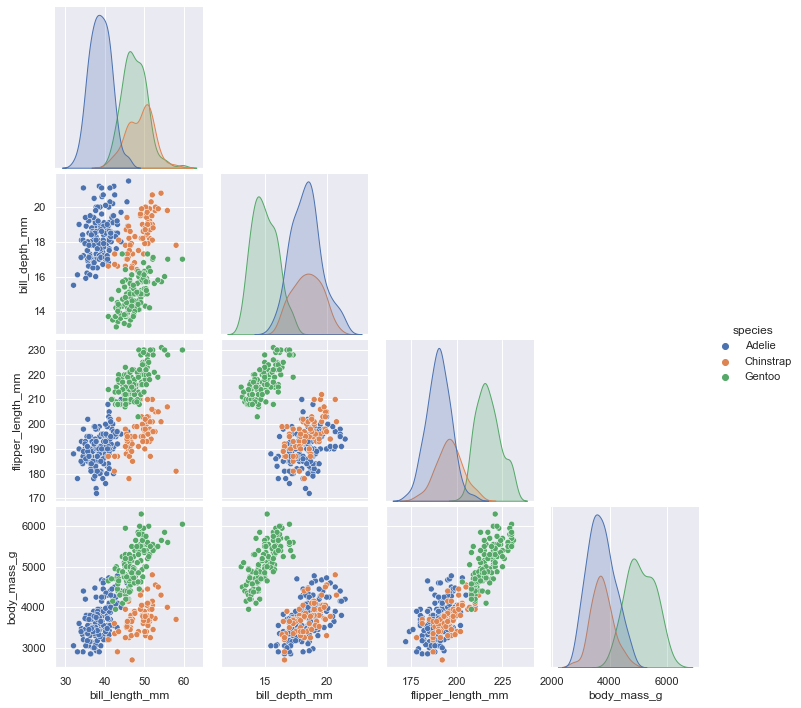

In [74]:
sns.pairplot(data=p, hue='species', corner=True)

# - part 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-pastel")
sns.set_theme(color_codes=True)

In [2]:
p = sns.load_dataset('penguins')

In [3]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
species = p.groupby('species')["species"].count()

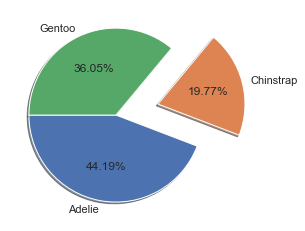

In [6]:
plt.pie(species, labels=species.index, autopct="%0.2f%%", explode=[0,0.5, 0],shadow=True, startangle=180 );

# CLT

according to the CLT, if we have

x1+x2+x3+x4 + ... + xn = nX(bar) = X

this X will have a normal distribution - N(nMU, sigma * rootN)



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
uni = np.random.uniform(0, 200, size=(50000))

/Users/pushpakruhil/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

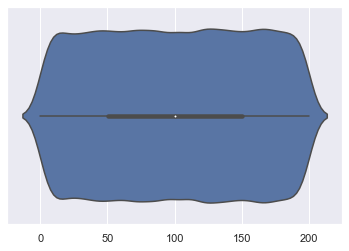

In [26]:
sns.violinplot(uni)

In [4]:
np.random.choice(uni,5)

array([ 46.83936775, 177.73660448, 136.50850575,  84.27178771,
        16.59647993])

In [50]:
X = 0
for i in range(1000): #this is our n
    X_n = np.random.choice(uni, 50, replace=False)
    X_n = (np.mean(X_n) - uni.mean())/np.std(uni)
    X = np.append(X, X_n)

<AxesSubplot:ylabel='Density'>

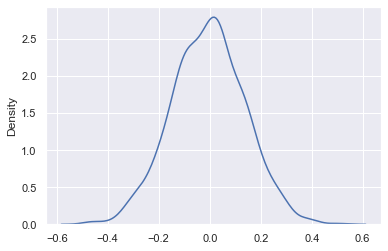

In [51]:
sns.kdeplot(X)

<AxesSubplot:ylabel='Density'>

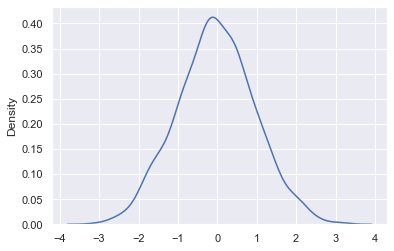

In [37]:
y = np.random.normal(0,1, 1000)

sns.kdeplot(y)

In [31]:
uni.mean()

100.19379277390087

In [32]:
uni.std()

57.63454989896737

In [42]:
X.mean()

85.48599864603204

In [43]:
np.std(X)

7.24516833082848